### Analysis of cars purchased in Ukraine from 2013 to 2024

Import libraries

In [2]:
import pandas as pd 
import numpy as np
import json
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL.ImageChops import duplicate
from jedi.api.refactoring import inline

%matplotlib inline

Import one of the datasets to view the data

In [8]:
df = pd.read_csv('tz_opendata_z01012024_po01122024.csv', sep=';', low_memory=False)

Let's look at the columns

In [9]:
df.columns

Index(['PERSON', 'REG_ADDR_KOATUU', 'OPER_CODE', 'OPER_NAME', 'D_REG',
       'DEP_CODE', 'DEP', 'BRAND', 'MODEL', 'VIN', 'MAKE_YEAR', 'COLOR',
       'KIND', 'BODY', 'PURPOSE', 'FUEL', 'CAPACITY', 'OWN_WEIGHT',
       'TOTAL_WEIGHT', 'N_REG_NEW'],
      dtype='object')

In [10]:
df.head()

,PERSON,REG_ADDR_KOATUU,OPER_CODE,OPER_NAME,D_REG,DEP_CODE,DEP,BRAND,MODEL,VIN,MAKE_YEAR,COLOR,KIND,BODY,PURPOSE,FUEL,CAPACITY,OWN_WEIGHT,TOTAL_WEIGHT,N_REG_NEW
0,J,2.310137e+09,18,ВНЕСЕННЯ КАРТКИ ВІДОМЧОЇ РЕЄСТРАЦІЇ ТЗ (ТІЛЬКИ...,01.01.24,12268,ТСЦ 2342,ATAMAN,D-09216,Y7BD09216PB000395,2023,БІЛИЙ,АВТОБУС,АВТОБУС ОПЕРАТИВНИЙ,СПЕЦІАЛІЗОВАНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,5193.0,5840,8850,АР535Е
1,J,3.221810e+09,18,ВНЕСЕННЯ КАРТКИ ВІДОМЧОЇ РЕЄСТРАЦІЇ ТЗ (ТІЛЬКИ...,01.01.24,12290,ТСЦ 8041,TOYOTA,LAND CRUISER 200,JTMHV05J104045463,2010,ЧОРНИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ,СПЕЦІАЛІЗОВАНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,4461.0,2715,3300,ТІ111G
2,P,5.123355e+09,284,НАЛЕЖНИЙ КОРИСТУВАЧ. ВИКЛЮЧЕННЯ ВІДОМОСТЕЙ,01.01.24,10000,OLD_ДДАІ МВС УКРАЇНИ,VOLKSWAGEN,GOLF,WVWZZZ1JZ3W331148,2002,СІРИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,БЕНЗИН,1390.0,1204,1710,ВН7469ОХ
3,P,8.038000e+09,284,НАЛЕЖНИЙ КОРИСТУВАЧ. ВИКЛЮЧЕННЯ ВІДОМОСТЕЙ,01.01.24,10000,OLD_ДДАІ МВС УКРАЇНИ,KIA,SPORTAGE,U5YPK813DGL012105,2015,БІЛИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,1995.0,1690,2250,КА9443ЕМ
4,P,6.520386e+09,284,НАЛЕЖНИЙ КОРИСТУВАЧ. ВИКЛЮЧЕННЯ ВІДОМОСТЕЙ,01.01.24,10000,OLD_ДДАІ МВС УКРАЇНИ,ЗАЗ,110307,Y6D11030740066050,2004,СИНІЙ,ЛЕГКОВИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,БЕНЗИН,1197.0,790,1190,ВТ9040АХ


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231400 entries, 0 to 2231399
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PERSON           object 
 1   REG_ADDR_KOATUU  float64
 2   OPER_CODE        int64  
 3   OPER_NAME        object 
 4   D_REG            object 
 5   DEP_CODE         int64  
 6   DEP              object 
 7   BRAND            object 
 8   MODEL            object 
 9   VIN              object 
 10  MAKE_YEAR        int64  
 11  COLOR            object 
 12  KIND             object 
 13  BODY             object 
 14  PURPOSE          object 
 15  FUEL             object 
 16  CAPACITY         float64
 17  OWN_WEIGHT       object 
 18  TOTAL_WEIGHT     object 
 19  N_REG_NEW        object 
dtypes: float64(2), int64(3), object(15)
memory usage: 340.5+ MB


Let's see which persons are in the dataset list

In [12]:
df['PERSON'].value_counts().head(10)

PERSON
P    2071961
J     159439
Name: count, dtype: int64

The data set includes both private individuals and entrepreneurs

In [13]:
df_prof=df[['PERSON', 'OPER_NAME','D_REG', 'BRAND', 'MODEL', 
            'MAKE_YEAR', 'COLOR', 'KIND', 'BODY', 'PURPOSE', 'FUEL']]

We will leave only the data we need and make a report

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df_prof)

Let's download all data

In [11]:
if not os.path.exists('files'):
    os.makedirs('files')

with open('datapackage.json', 'r') as json_file:
    data = json.load(json_file)

for resource in data['resources']:
    path = resource['path']
    file_name = path.split("/")[-1]

    response = requests.get(path)

    if response.status_code == 200:
        # Save the file in the 'files' folder
        with open(os.path.join('files', file_name), 'wb') as file:
            file.write(response.content)
        print(f"Downloaded: {file_name}")
    else:
        print(f"Failed to download: {file_name}")

print("Download complete.")

Downloaded: tz_opendata_z01012018_po01012019.zip
Downloaded: tz_opendata_z01012017_po31122017.zip
Downloaded: tz_opendata_z01012016_po31122016.zip
Downloaded: tz_opendata_z01012015_po31122015.zip
Downloaded: tz_opendata_z01012014_po31122014.zip
Downloaded: tz_opendata_z01012013_po31122013.zip
Downloaded: tz_opendata_z01012019_po01012020.zip
Downloaded: tz_opendata_z01012020_po01012021.zip
Downloaded: tz_opendata_z01012021_po01012022.zip
Downloaded: reestrtz2022.zip
Downloaded: reestrtz2022.zip
Downloaded: reestrtz2022.zip
Downloaded: reestrtz2023.zip
Downloaded: reestrtz2024.zip
Download complete.


In [12]:
# List files in the 'files' folder
files = os.listdir('files')

# Iterate through the files and unzip any zip archives
for file_name in files:
    if file_name.endswith('.zip'):
        # Specify the path of the zip file
        zip_path = os.path.join('files', file_name)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Extract files into the 'files' folder
            zip_ref.extractall('files')
            print(f"Extracted: {file_name}")

        # Delete the zip file after extraction
        os.remove(zip_path)
        print(f"Deleted: {file_name}")

print("Extraction of zip files complete.")

Extracted: reestrtz2022.zip
Deleted: reestrtz2022.zip
Extracted: reestrtz2023.zip
Deleted: reestrtz2023.zip
Extracted: reestrtz2024.zip
Deleted: reestrtz2024.zip
Extracted: tz_opendata_z01012013_po31122013.zip
Deleted: tz_opendata_z01012013_po31122013.zip
Extracted: tz_opendata_z01012014_po31122014.zip
Deleted: tz_opendata_z01012014_po31122014.zip
Extracted: tz_opendata_z01012015_po31122015.zip
Deleted: tz_opendata_z01012015_po31122015.zip
Extracted: tz_opendata_z01012016_po31122016.zip
Deleted: tz_opendata_z01012016_po31122016.zip
Extracted: tz_opendata_z01012017_po31122017.zip
Deleted: tz_opendata_z01012017_po31122017.zip
Extracted: tz_opendata_z01012018_po01012019.zip
Deleted: tz_opendata_z01012018_po01012019.zip
Extracted: tz_opendata_z01012019_po01012020.zip
Deleted: tz_opendata_z01012019_po01012020.zip
Extracted: tz_opendata_z01012020_po01012021.zip
Deleted: tz_opendata_z01012020_po01012021.zip
Extracted: tz_opendata_z01012021_po01012022.zip
Deleted: tz_opendata_z01012021_po01012

In [6]:
# Check files in the 'files' folder
folder_path = os.getcwd()
print("\nFiles in the 'files' folder:")
files_folder_path = os.path.join(folder_path, 'files')
for filename in os.listdir(files_folder_path):
    print(filename)


Files in the 'files' folder:
tz_opendata_z01012013_po31122013.csv
tz_opendata_z01012014_po31122014.csv
tz_opendata_z01012015_po31122015.csv
tz_opendata_z01012016_po31122016.csv
tz_opendata_z01012017_po31122017.csv
tz_opendata_z01012018_po01012019.csv
tz_opendata_z01012019_po01012020.csv
tz_opendata_z01012020_po01012021.csv
tz_opendata_z01012021_po01012022.csv
tz_opendata_z01012022_po01012023.csv
tz_opendata_z01012023_po01012024.csv
tz_opendata_z01012024_po01122024.csv


In [7]:
# change '.ßsv' file 
for filename in os.listdir(files_folder_path):
    if not filename.endswith('.csv'):
        # Rename the file to end with '.csv'
        new_filename = os.path.splitext(filename)[0] + '.csv'
        os.rename(os.path.join(files_folder_path, filename), os.path.join(files_folder_path, new_filename))
        print('file ', filename, ' renamed')

In [8]:
#Create a df for all the data 

result_df = pd.DataFrame()

for filename in os.listdir(files_folder_path):

    if filename.endswith('.csv'):
        file_path = os.path.join(files_folder_path, filename)    
        df = pd.read_csv(file_path, sep = ';', low_memory=False)
        df.columns = df.columns.str.upper()        
        result_df = pd.concat([result_df, df], ignore_index=True)
        print(filename, 'added')
print('I\'m done')

tz_opendata_z01012013_po31122013.csv added
tz_opendata_z01012014_po31122014.csv added
tz_opendata_z01012015_po31122015.csv added
tz_opendata_z01012016_po31122016.csv added
tz_opendata_z01012017_po31122017.csv added
tz_opendata_z01012018_po01012019.csv added
tz_opendata_z01012019_po01012020.csv added
tz_opendata_z01012020_po01012021.csv added
tz_opendata_z01012021_po01012022.csv added
tz_opendata_z01012022_po01012023.csv added
tz_opendata_z01012023_po01012024.csv added
tz_opendata_z01012024_po01122024.csv added
I'm done


In [9]:
print(len(result_df))

21223093


Let's make a checkpoint

In [10]:
all_years = result_df.copy()

In [11]:
#Optional: choose only relevant fields.  
all_years = all_years[['PERSON', 'OPER_CODE', 'OPER_NAME', 'D_REG', 'BRAND', 
                       'MODEL', 'MAKE_YEAR', 'COLOR', 'KIND','BODY',
                      'PURPOSE','FUEL', 'VIN']]

#filter df 
all_years = all_years[(all_years['PERSON']=='P')&
                      (all_years['KIND'] =='ЛЕГКОВИЙ')&
                      (all_years['PURPOSE'] =='ЗАГАЛЬНИЙ')]

In [12]:

#find neccessary codes 
all_years[all_years['OPER_NAME'].str.upper().str.contains('ПЕРВИННА')]['OPER_CODE'].unique()

array([ 30, 100,  99, 172, 105], dtype=int64)

In [13]:
all_years[['OPER_CODE', 'OPER_NAME']].value_counts().head(20) 

OPER_CODE  OPER_NAME                                                                                            
315        ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ                                            3103544
308        ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПIВЛI-ПРОДАЖУ (СГ)                                           1908283
71         РЕЄСТРАЦІЯ ТЗ ПРИВЕЗЕНОГО З-ЗА КОРДОНУ ПО ПОСВІДЧЕННЮ МИТНИЦІ                                            1066966
530        530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ                                                                     1013723
315        315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ                                       893516
40         40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ                                        878038
100        ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ               547851
400        400 - ПЕ

In [14]:
#filter df to contain only ПЕРВИННА РЕЄСТРАЦІЯ (and 70, 71 )
list_of_codes = [105, 100,  99,  30, 172, 70, 71]
filtered_df = all_years[all_years['OPER_CODE'].isin(list_of_codes)]
filtered_df.reset_index(inplace=True)

Data after filtering

In [15]:
len(filtered_df) 

3084373

In [16]:
#check if unique
filtered_df['VIN'].duplicated().sum() 

1546546

In [17]:
duplicates = filtered_df['VIN'].duplicated()
filtered_df[duplicates].tail(6)

,index,PERSON,OPER_CODE,OPER_NAME,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,KIND,BODY,PURPOSE,FUEL,VIN
2930973,19871531,P,100,ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВ...,09.05.24,RENAULT,MEGANE,2020,БІЛИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН,VF1RFB00966243831
2944936,20056375,P,105,ПЕРВИННА РЕЄСТРАЦІЯ НОВОГО ТЗ ПРИДБАНОГО В ТОР...,29.05.24,SKODA,KAROQ,2023,БІЛИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ,ЗАГАЛЬНИЙ,БЕНЗИН,TMBJC7NU5PB200757
2945189,20056902,P,100,ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВ...,29.05.24,HYUNDAI,SONATA,2012,БІЛИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН,KMHEC41BBCA427348
2993061,20502190,P,100,ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВ...,31.07.24,TOYOTA,PRIUS,2013,БІЛИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,ЕЛЕКТРО АБО БЕНЗИН,JTDKN36U505629813
2993742,20503320,P,105,ПЕРВИННА РЕЄСТРАЦІЯ НОВОГО ТЗ ПРИДБАНОГО В ТОР...,31.07.24,MITSUBISHI,ASX,2021,ЧЕРВОНИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ,ЗАГАЛЬНИЙ,БЕНЗИН,JMBXTGA2WNU002213
3022032,20684140,P,100,ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВ...,28.08.24,TOYOTA,CAMRY,2021,ЧОРНИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН,JTNB14HK203151273


In [18]:
#without NAs 
filtered_df[~filtered_df['VIN'].isna()].duplicated().sum()


0

In [19]:
firsts_df = filtered_df[['D_REG','BRAND', 'MODEL', 'MAKE_YEAR','COLOR','FUEL']]
firsts_df.to_csv('first_reg_all_years.csv')
firsts_df.head()

,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,FUEL
0,2013-06-08,FIAT LINEA,LINEA,2013,СІРИЙ,БЕНЗИН АБО ГАЗ
1,2013-01-19,HYUNDAI IX35,IX35,2012,СИНІЙ,БЕНЗИН
2,2013-02-05,HYUNDAI ACCENT,ACCENT,2012,СІРИЙ,БЕНЗИН
3,2013-01-18,ЗАЗ SENS,SENS,2012,БІЛИЙ,БЕНЗИН
4,2013-08-30,GEELY EMGRAND 7,EMGRAND 7,2013,БІЛИЙ,БЕНЗИН


In [20]:
firsts_df.dtypes

D_REG        object
BRAND        object
MODEL        object
MAKE_YEAR     int64
COLOR        object
FUEL         object
dtype: object

Data format check


In [21]:
years = [x+1 for x in range(2012,2024)]
for year in years:
    s = firsts_df[firsts_df['D_REG'].str.contains(str(year))]['D_REG']
    print(s.max())

2013-12-30
2014-12-30
2015-12-30
2016-12-30
2017-12-30
2018-12-30
31.10.2019
31.12.2020
31.12.2021
31.12.2022
nan
nan


In [22]:
years = [23, 24]
for year in years:
    s = firsts_df[firsts_df['D_REG'].str.contains(str(year), na=False)]['D_REG']
    print(f"Unique values for {year}:")
    print(s.unique())
    print("-" * 50)


Unique values for 23:
['2013-01-23' '2013-02-23' '2013-08-23' '2013-07-23' '2013-03-23'
 '2013-05-23' '2013-04-23' '2013-10-23' '2013-11-23' '2013-09-23'
 '2013-12-23' '2014-01-23' '2014-09-23' '2014-03-23' '2014-05-23'
 '2014-04-23' '2014-07-23' '2014-06-23' '2014-08-23' '2014-10-23'
 '2014-12-23' '2015-01-23' '2015-02-23' '2015-04-23' '2015-05-23'
 '2015-06-23' '2015-07-23' '2015-09-23' '2015-10-23' '2015-11-23'
 '2015-12-23' '2016-09-23' '2016-10-23' '2016-12-23' '2016-11-23'
 '2016-04-23' '2016-06-23' '2016-01-23' '2016-02-23' '2016-03-23'
 '2016-07-23' '2016-08-23' '2017-02-23' '2017-03-23' '2017-04-23'
 '2017-05-23' '2017-06-23' '2017-07-23' '2017-08-23' '2017-09-23'
 '2017-11-23' '2017-12-23' '2018-01-23' '2018-03-23' '2018-02-23'
 '2018-05-23' '2018-06-23' '2018-08-23' '2018-10-23' '2018-09-23'
 '2018-11-23' '2018-12-23' '23.02.2019' '23.10.2019' '23.08.2019'
 '23.12.2019' '23.11.2019' '23.01.2019' '23.04.2019' '23.07.2019'
 '23.03.2019' '23.05.2019' '23.06.2019' '23.07.2020' '

Convert date format to datetime

In [23]:
#converting all the dates. It takes a while. 
def convert_date(date_str):
    if '-' in date_str:
        # Dates from 2013 to 2018 are in the format '2013-12-30'
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    elif len(date_str) == 10:
        # Dates from 2019 to 2022 are in the format '31.10.2019'
        return pd.to_datetime(date_str, format='%d.%m.%Y')
    else:
        # Dates from 2023 to 2024 are in the format '20.10.23'
        return pd.to_datetime(date_str, format='%d.%m.%y')

# Apply the function to the 'D_REG' column
firsts_df['D_REG'] = firsts_df['D_REG'].apply(convert_date)

C:\Users\HP\AppData\Local\Temp\ipykernel_26628\3318956838.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firsts_df['D_REG'] = firsts_df['D_REG'].apply(convert_date)


In [24]:
firsts_df.dtypes

D_REG        datetime64[ns]
BRAND                object
MODEL                object
MAKE_YEAR             int64
COLOR                object
FUEL                 object
dtype: object

In [25]:
frsts = firsts_df.copy()
frsts.head()

,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,FUEL
0,2013-06-08,FIAT LINEA,LINEA,2013,СІРИЙ,БЕНЗИН АБО ГАЗ
1,2013-01-19,HYUNDAI IX35,IX35,2012,СИНІЙ,БЕНЗИН
2,2013-02-05,HYUNDAI ACCENT,ACCENT,2012,СІРИЙ,БЕНЗИН
3,2013-01-18,ЗАЗ SENS,SENS,2012,БІЛИЙ,БЕНЗИН
4,2013-08-30,GEELY EMGRAND 7,EMGRAND 7,2013,БІЛИЙ,БЕНЗИН


In [26]:
frsts.loc[:, 'YEAR'] = frsts['D_REG'].dt.year

In [27]:
# Group by 'YEAR' and count the number of rows for each year
car_count_by_year = frsts.groupby('YEAR').size()

# If you want the result as a DataFrame
car_count_by_year_df = pd.DataFrame(car_count_by_year, columns=['Car Count'])

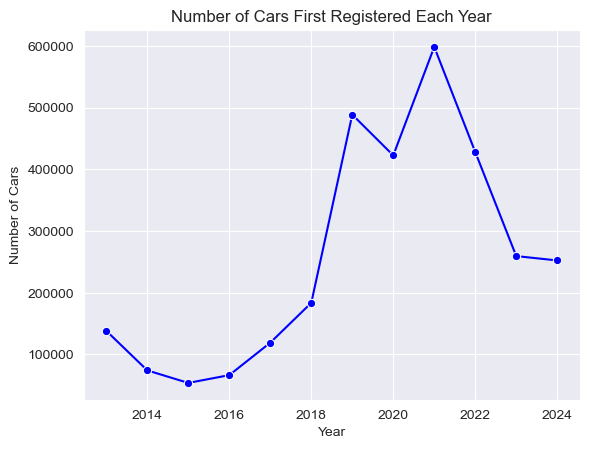

In [28]:
sns.lineplot(x='YEAR', y='Car Count', marker='o', linestyle='-', color='b', data=car_count_by_year_df)
plt.title('Number of Cars First Registered Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

cars each year by color


In [29]:
top_colors_by_year = frsts.groupby('YEAR')['COLOR'].value_counts().reset_index(name='Count')
pivoted_colors_by_year = top_colors_by_year.pivot(index='COLOR', columns='YEAR', values='Count')
pivoted_colors_by_year


YEAR,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
COLOR,,,,,,,,,,,,
БІЛИЙ,29991.0,17785.0,10357.0,16575.0,27885.0,39046.0,57632.0,66976.0,85250.0,50241.0,47927.0,52758.0
БЕЖЕВИЙ,7487.0,3594.0,1605.0,1795.0,2001.0,2547.0,4853.0,4197.0,6608.0,5093.0,3163.0,3114.0
ЖОВТИЙ,882.0,467.0,337.0,376.0,605.0,802.0,2383.0,1822.0,2270.0,1560.0,711.0,678.0
ЗЕЛЕНИЙ,3525.0,1254.0,1149.0,824.0,991.0,2134.0,15901.0,7010.0,14514.0,9817.0,4196.0,4028.0
КОРИЧНЕВИЙ,6286.0,4495.0,2805.0,4392.0,7937.0,9175.0,12835.0,12570.0,14652.0,9153.0,6102.0,4604.0
НЕВИЗНАЧЕНИЙ,NaN,3.0,5.0,11.0,5.0,1.0,11.0,12.0,7.0,2.0,1.0,1.0
ОРАНЖЕВИЙ,733.0,400.0,213.0,339.0,580.0,902.0,1414.0,1747.0,2730.0,1277.0,889.0,900.0
СІРИЙ,42478.0,21017.0,16786.0,19301.0,37175.0,60270.0,190839.0,154659.0,227329.0,170219.0,93696.0,88289.0
СИНІЙ,9908.0,4871.0,5008.0,5409.0,10282.0,18114.0,69316.0,51759.0,76575.0,53159.0,29418.0,27460.0


In [30]:
pivoted_colors_by_year.to_csv('colors_by_year.csv')


Brands by year

In [31]:
frsts[frsts['YEAR']==2013][['BRAND', 'MODEL']].value_counts().head(10)

BRAND             MODEL   
HYUNDAI  ACCENT   ACCENT      3495
ЗАЗ  SENS         SENS        3186
KIA  RIO          RIO         2968
RENAULT  LOGAN    LOGAN       2584
ЗАЗ  VIDA         VIDA        2433
VOLKSWAGEN  POLO  POLO        2169
KIA  SPORTAGE     SPORTAGE    1973
ЗАЗ  LANOS        LANOS       1919
NISSAN  QASHQAI   QASHQAI     1911
FORD  FOCUS       FOCUS       1896
Name: count, dtype: int64

In [32]:
#only the first word of 'wrong' brands will be a brand 
frsts.loc[:,'brand_only'] = frsts['BRAND'].apply(lambda x: x.split()[0])

In [33]:
frsts['brand_only'].nunique()

246

In [34]:
frsts['brand_only'].value_counts().tail(10)

brand_only
COWIN           1
FREIGHTLINER    1
LEYLAND         1
СМЗ             1
OLTCIT          1
KARRY           1
GEOMETRY        1
ELBIL           1
BEIJING         1
TIANMA          1
Name: count, dtype: int64

In [35]:
brands_by_year_all = frsts.groupby('YEAR')['brand_only'].value_counts().reset_index(name='Count')

# Rank the brands within each year 
brands_by_year_all.loc[:,'rank'] = brands_by_year_all.groupby('YEAR')['Count'].rank(method='dense', ascending=False)

# Filter out the top 10 brands for each year
top_brands_df = brands_by_year_all[brands_by_year_all['rank'] <= 10]

# Sorting by year and rank for better readability
top_brands_df = top_brands_df.sort_values(by=['YEAR', 'rank'])

# Reset index for the final DataFrame
top_brands_df.reset_index(drop=True, inplace=True)

In [36]:
#same pivoting as with colors 
pivoted_brands_by_year_all = top_brands_df.pivot(index='brand_only', columns='YEAR', values='rank')

In [37]:
pivoted_brands_by_year_all

YEAR,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
brand_only,,,,,,,,,,,,
AUDI,NaN,NaN,NaN,NaN,NaN,10.0,6.0,NaN,8.0,6.0,5.0,2.0
BMW,NaN,NaN,NaN,7.0,10.0,9.0,7.0,NaN,NaN,7.0,7.0,5.0
FORD,10.0,8.0,8.0,9.0,9.0,5.0,5.0,3.0,3.0,3.0,6.0,7.0
GEELY,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HYUNDAI,1.0,5.0,6.0,10.0,NaN,8.0,10.0,5.0,6.0,NaN,9.0,8.0
KIA,7.0,10.0,9.0,5.0,6.0,NaN,NaN,9.0,10.0,NaN,NaN,NaN
MAZDA,NaN,NaN,7.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
MERCEDES-BENZ,NaN,NaN,10.0,6.0,7.0,NaN,9.0,NaN,NaN,8.0,NaN,NaN
NISSAN,5.0,7.0,5.0,4.0,5.0,6.0,NaN,8.0,7.0,9.0,4.0,3.0


In [38]:
pivoted_brands_by_year_all.to_csv('brands_by_year_all.csv')

In [39]:
#with counts instead of rating for vizualization
pivoted_brands_counts = top_brands_df.pivot(index='brand_only', columns='YEAR', values='Count')
pivoted_brands_counts.to_csv('pivoted_brands_counts.csv')

In [40]:
#unpivoted table for heatmap
top_brands_df.to_csv('top_brands_heatmap.csv')

Share of electric cars

In [41]:
fuel_by_year = frsts.groupby(['YEAR', 'FUEL']).size().reset_index(name='Count')

pivoted_fuel_by_year = fuel_by_year.pivot(index='FUEL', columns='YEAR', values='Count')

pivoted_fuel_by_year['electro'] = pivoted_fuel_by_year.index.str.contains('ЕЛЕКТРО')
electro = pivoted_fuel_by_year.groupby('electro').sum()
electro = electro.T
electro

electro,False,True
YEAR,,
2013,138061.0,83.0
2014,73925.0,217.0
2015,53178.0,695.0
2016,64644.0,1862.0
2017,114755.0,4314.0
2018,174842.0,8732.0
2019,474533.0,13961.0
2020,405908.0,16537.0
2021,575378.0,22801.0


<BarContainer object of 12 artists>

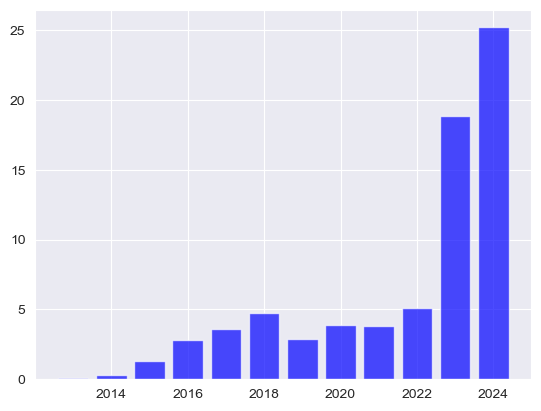

In [42]:

electro['year_total'] = electro[True] + electro[False]
electro['share_true'] = electro[True] / electro['year_total']
plt.bar(electro.index, electro['share_true'] * 100, color='blue', alpha=0.7)